In [31]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Reading files

In [2]:
df = []
#reading 4 csv files
for i in range(1,5):
    df.append(pd.read_csv('datafile'+str(i)+'.csv',header=None))

### Data Exploration

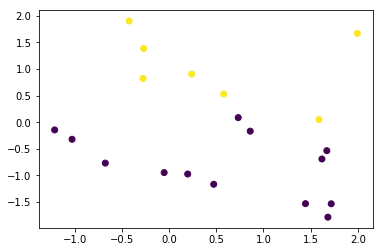

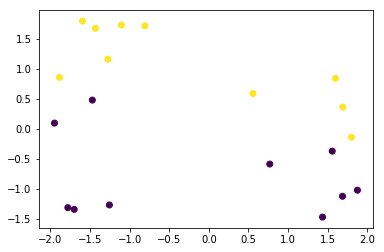

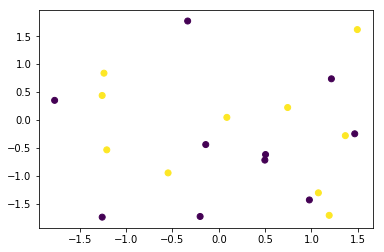

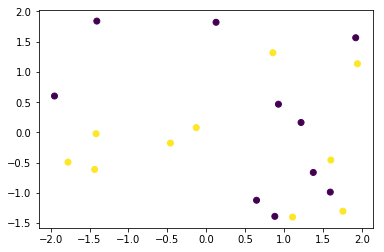

In [3]:
for i in range(len(df)):
    label = df[i][2]
    plt.scatter(df[i][0],df[i][1], c=label)
    plt.show()

### Weight fitting (using Stochastic Gradient Descent) 

In [21]:
def get_accuracy(data,W,bias):
    c=0
    for data_point in data:
            X = np.array([data_point[0],data_point[1],bias])
            error = data_point[-1] - predict(X,W)
            if(error)  == 0:
                c=c+1      
    return ((c/20)*100) 
    

In [22]:
def predict(data_point, W):
    if (np.dot(data_point, W)) < 0:
        return 0
    else:
        return 1

In [23]:
def find_weight(data, W,bias, max_iter=15, alpha=0.1):
    iter_count = 0
    w_graph = []
    w_bias = []
    error_sum = 1000
    while((error_sum>0.0) & (iter_count<max_iter)):
        error_sum = 0
        for data_point in data:
            X = np.array([data_point[0],data_point[1],bias])
            error = data_point[-1] - predict(X,W) 
            W = W + alpha * error * data_point
            bias = bias + error
            w_graph.append(W[:-1])
            w_bias.append(W[:2])
            error_sum += (error**2)
        iter_count+=1
    if(error_sum==0.0):
        print("CONVERGED AT ",iter_count)
    else:
        print("not converged within 15 iterations")
    return W,bias,w_graph,w_bias
    

In [26]:
w1 = np.random.rand(2,1)
bias = np.random.rand(1)

In [60]:
W = np.array([w1[0,0],w1[1,0],1])
for i in range(4):
    print("For file ",i+1)
    W_new,bias_new = find_weight(df[i].as_matrix(),W,bias)[0:2]
    print("Accuracy ",get_accuracy(df[i].as_matrix(),W_new,bias_new),"%")
    print("------------------------------------------------------------")
    
    

For file  1
CONVERGED AT  7
Accuracy  100.0 %
------------------------------------------------------------
For file  2
CONVERGED AT  4
Accuracy  100.0 %
------------------------------------------------------------
For file  3
not converged within 15 iterations
Accuracy  55.00000000000001 %
------------------------------------------------------------
For file  4
not converged within 15 iterations
Accuracy  50.0 %
------------------------------------------------------------


## Animation for each epoch 

In [41]:
graph_w = []
graph_b = []
for i in range(4):
    graph_w.append(find_weight(df[i].as_matrix(),W,bias)[2])
    graph_b.append(find_weight(df[i].as_matrix(),W,bias)[3])

CONVERGED AT  7
CONVERGED AT  7
CONVERGED AT  4
CONVERGED AT  4
not converged within 15 iterations
not converged within 15 iterations
not converged within 15 iterations
not converged within 15 iterations


##### call anime(i) for see the visualiztion of updation of weights & see its fitting for 'i' th csv file

In [53]:
def anime(k):  
    x_plot = np.array([df[k].ix[:,0].min(), df[k].ix[:,1].max()])
    y_plot = (-graph_b[k][-1][0] - np.dot(graph_w[k][-1][0], x_plot)) / graph_w[k][-1][1]


    def animate(i, x_plot, y_plot, line):
        y_plot = (-graph_b[k][i][0] - np.dot(graph_w[k][i][0], x_plot)) / graph_w[k][i][1]
        line.set_data(x_plot, y_plot)
        line.axes.axis([-2, 2, -2, 2])
        return line,
    fig, ax = plt.subplots()
    dat1 = df[k][df[k].ix[:,2]==0]
    dat2 = df[k][df[k].ix[:,2]==1]
    plt.scatter(dat1.ix[:,0], dat1.ix[:,1], c=['red'], )
    plt.scatter(dat2.ix[:,0], dat2.ix[:,1], c=['black'])
    line, = ax.plot(x_plot, y_plot)
    anim = animation.FuncAnimation(fig, animate, frames=len(graph_w[k]), fargs=[x_plot, y_plot, line], blit=True, interval = 1000)
    print (x_plot, y_plot)
    anim.save('data'+str(k)+'.gif')
    plt.show()

<IPython.core.display.Javascript object>


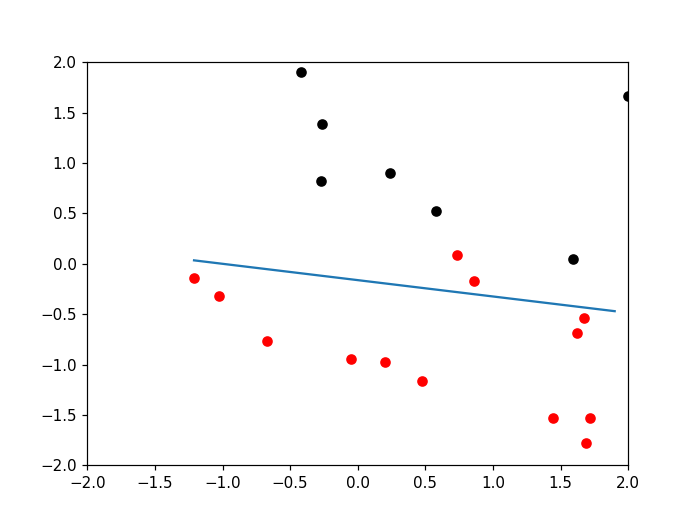

[-1.21073265  1.89891073] [ 0.03416589 -0.46999779]


/home/user/stackRoute/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [54]:
anime(0)